# Topics over time

In [1]:
#### Imports
import gensim
import pandas as pd 
import pickle as pkl 
import altair as alt
import numpy as np 
import os 

import logging
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
#import pyLDAvis.gensim


import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import re
import pyLDAvis

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from helper_functions import *


/home/coder/.local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/coder/.local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', co

In [3]:
# preparing the data
data, diplomats, media = prep_data()

/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# loading the model
with open("data/models/Diplomat_LDA.pkl", "rb") as f:
    lda = pkl.load(f)

/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# creating topics over time dataframe for plotting
df = topics_over_time(lda, diplomats)

/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def plot_subset(df, range, legend_size, figname, figsize = (7.5, 4), dpi = 100): 
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    for topic in range: 
        df_tmp = df[df["topic_id"] == topic].sort_values(by = 'time')
        ax.plot(df_tmp['time'], df_tmp['average_weight'], label = f"Topic {topic}")
    ax.xaxis.set_major_locator(md.MonthLocator(interval = 2))
    ax.xaxis.set_major_formatter(md.DateFormatter('%b %y'))
    ax.set_ylim(bottom = 0, top = 0.4)
    ax.legend(frameon = True, loc = 'upper right', fontsize = legend_size)
    
    fig.savefig(f'plots/{figname}.png', bbox_inches = 'tight')


/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


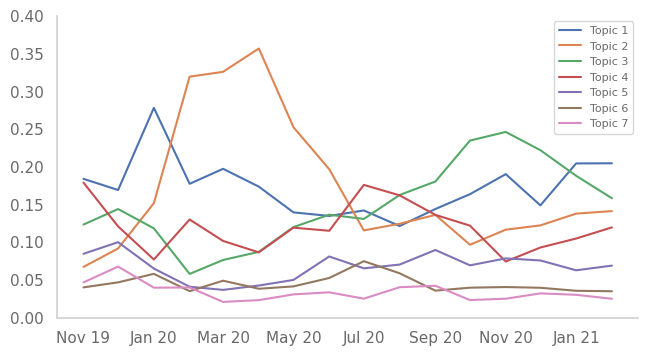

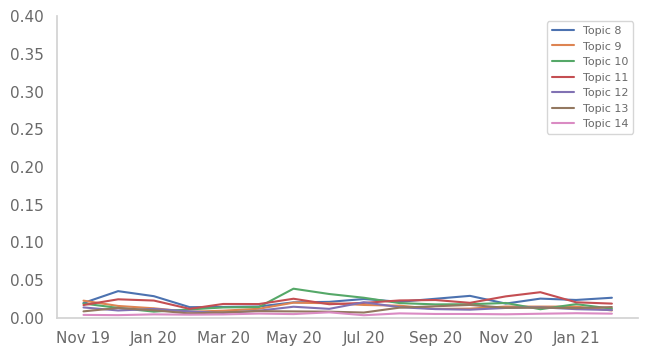

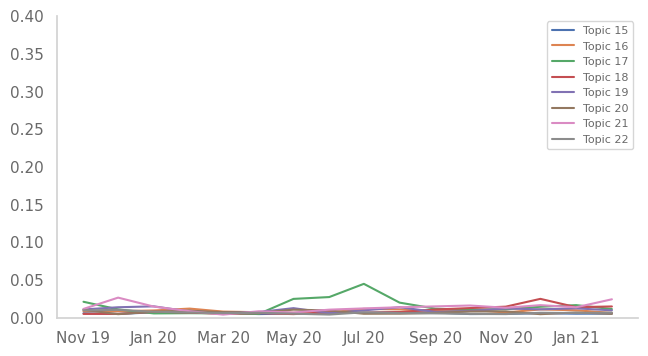

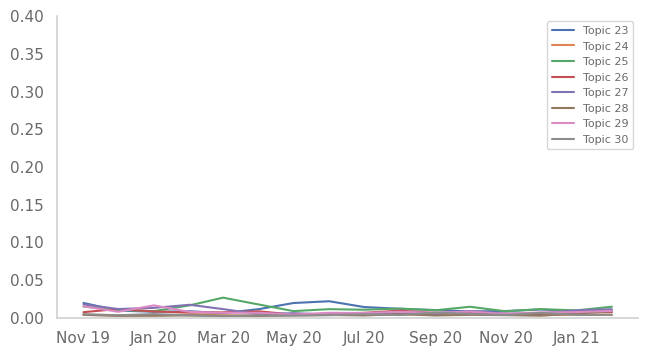

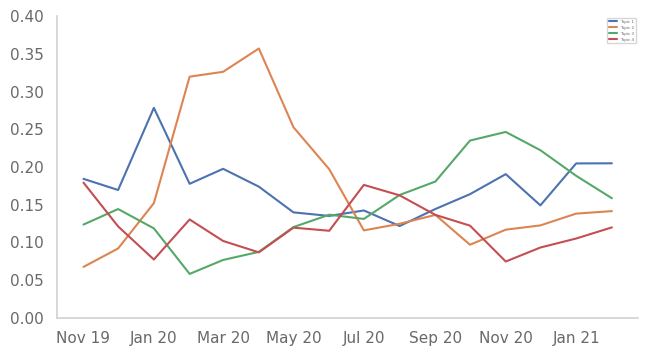

In [8]:
plot_subset(df, range(1, 8), 8, "topics_over_time_1_7")
plot_subset(df, range(8, 15), 8, "topics_over_time_8_14")
plot_subset(df, range(15, 23), 8, "topics_over_time_15_22")
plot_subset(df, range(23, 31), 8, "topics_over_time_23_30")
plot_subset(df, range(1,5), 3, "topics_over_time_1_3")

In [71]:
def plot_experimental(df, range, legend_size, figname, figsize = (7.5, 4), dpi = 100, ncol = 7): 
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    for topic in range: 
        df_tmp = df[df["topic_id"] == topic].sort_values(by = 'time')
        ax.plot(df_tmp['time'], df_tmp['average_weight'], label = f'{topic}')
    
    ax.xaxis.set_major_locator(md.MonthLocator(interval = 2))
    ax.xaxis.set_major_formatter(md.DateFormatter('%b %y'))
    ax.set_ylim(bottom = 0, top = 0.4)
    ax.legend(
        frameon = True, 
        loc = 'upper center', 
        bbox_to_anchor = (0.5, 1.05), 
        ncol = ncol, 
        fontsize = legend_size,
        handlelength = 1)

    fig.savefig(f'plots/{figname}.png', bbox_inches = 'tight')


/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/coder/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


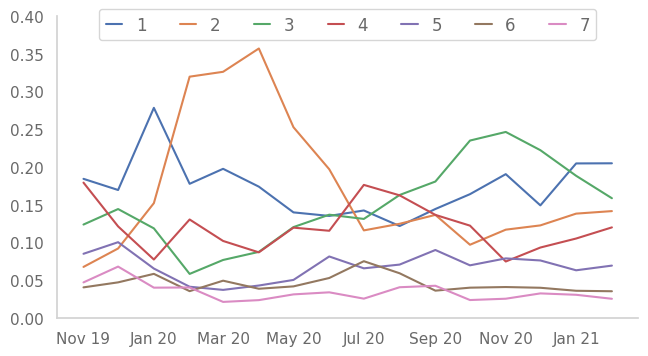

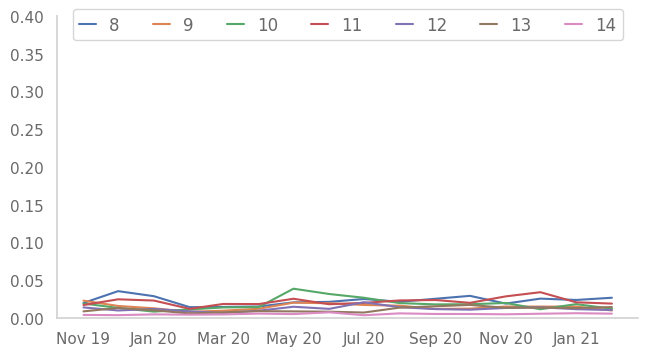

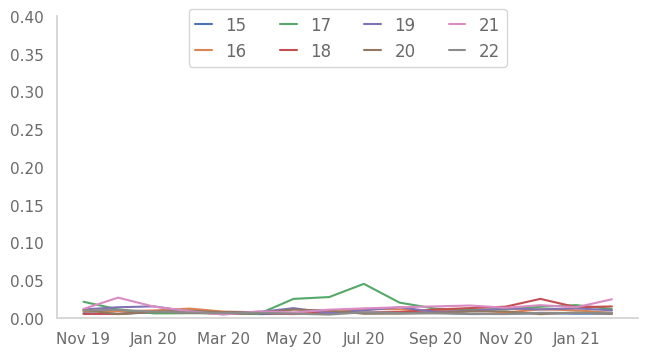

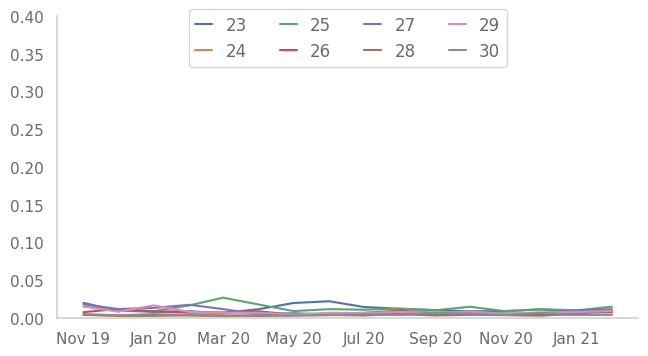

In [66]:
plot_experimental(df, range(1, 8), 12, "topics_over_time_1_7_legend")
plot_experimental(df, range(8, 15), 12, "topics_over_time_8_14_legend")
plot_experimental(df, range(15, 23), 12, "topics_over_time_15_22_legend", ncol = 4)
plot_experimental(df, range(23, 31), 12, "topics_over_time_23_30_legend", ncol = 4)